In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
from scipy import stats

# Load an example dataset
crimes_df = pd.read_csv('E:/曼海姆/data bootcamp/Crimes_Dataset.csv')
df_crimes_rename = crimes_df
df_crimes_rename.rename(columns={'Monster involved': 'monster_invol'}, inplace=True)
df_crimes_rename.rename(columns={'Days of Investigation': 'investigation_day'}, inplace=True)
df_crimes_rename.rename(columns={'Crime Type': 'crime_type'}, inplace=True)
df_crimes_rename.rename(columns={'Crime Weapon': 'crime_weapon'}, inplace=True)
df_crimes_rename.rename(columns={'Time of Day': 'day_time'}, inplace=True)
df_crimes_rename.rename(columns={'Evidence Found': 'evidence_found'}, inplace=True)
# Display first few rows of the data
df_crimes_rename.head()

,Index_Crimes,Date,monster_invol,investigation_day,Region,crime_type,crime_weapon,day_time,evidence_found
0,3834,2022-11-15,Werewolf,24.0,mountain,assault,brute force,dusk,blood
1,9635,2024-02-23,Vampire,36.0,castle,nightly disturbance,brute force,night,Blood
2,348,2020-04-01,Skeleton,96.0,swamp,vandalism,brute force,dusk,bones
3,6104,2022-07-05,Werewolf,93.0,mountain,assault,pistol,day,fur
4,1379,2022-02-11,Vampire,50.0,castle,nightly disturbance,axe,night,blood


In [15]:
# Check for missing values
df_crimes_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index_Crimes       10001 non-null  int64  
 1   Date               10000 non-null  object 
 2   monster_invol      10000 non-null  object 
 3   investigation_day  10000 non-null  float64
 4   Region             9998 non-null   object 
 5   crime_type         10000 non-null  object 
 6   crime_weapon       7403 non-null   object 
 7   day_time           10000 non-null  object 
 8   evidence_found     9995 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 703.3+ KB


In [16]:
#转化date数据类型
# Convert the data type of the date
crimes_df['Date'] = pd.to_datetime(crimes_df['Date'])
print(crimes_df['Date'].dtype)  
crimes_df.head()  # View the first few rows of the dataframe to confirm if the conversion was successful
# 查看数据框的前几行，确认转换是否成功

datetime64[ns]


,Index_Crimes,Date,monster_invol,investigation_day,Region,crime_type,crime_weapon,day_time,evidence_found
0,3834,2022-11-15,Werewolf,24.0,mountain,assault,brute force,dusk,blood
1,9635,2024-02-23,Vampire,36.0,castle,nightly disturbance,brute force,night,Blood
2,348,2020-04-01,Skeleton,96.0,swamp,vandalism,brute force,dusk,bones
3,6104,2022-07-05,Werewolf,93.0,mountain,assault,pistol,day,fur
4,1379,2022-02-11,Vampire,50.0,castle,nightly disturbance,axe,night,blood


In [17]:
# Convert to the number of days since January 1, 1 AD
# 转化成距离公元1年1月1日的天数
crimes_df['Date_numeric'] = crimes_df['Date'].apply(lambda x: x.toordinal() if pd.notnull(x) else None)
print(crimes_df['Date_numeric'].dtype)  
crimes_df.head()  

float64


,Index_Crimes,Date,monster_invol,investigation_day,Region,crime_type,crime_weapon,day_time,evidence_found,Date_numeric
0,3834,2022-11-15,Werewolf,24.0,mountain,assault,brute force,dusk,blood,738474.0
1,9635,2024-02-23,Vampire,36.0,castle,nightly disturbance,brute force,night,Blood,738939.0
2,348,2020-04-01,Skeleton,96.0,swamp,vandalism,brute force,dusk,bones,737516.0
3,6104,2022-07-05,Werewolf,93.0,mountain,assault,pistol,day,fur,738341.0
4,1379,2022-02-11,Vampire,50.0,castle,nightly disturbance,axe,night,blood,738197.0


In [18]:
# Check for missing values
df_crimes_rename.isnull().sum()

Index_Crimes            0
Date                    1
monster_invol           1
investigation_day       1
Region                  3
crime_type              1
crime_weapon         2598
day_time                1
evidence_found          6
Date_numeric            1
dtype: int64

In [19]:
# Check for duplicate rows
crimes_df.duplicated().sum()

np.int64(0)

In [20]:
df_crimes_rename = df_crimes_rename.dropna(subset=['Date', 'monster_invol', 'investigation_day','crime_type','day_time'])

In [21]:
# Check for missing values
df_crimes_rename.isnull().sum()

Index_Crimes            0
Date                    0
monster_invol           0
investigation_day       0
Region                  2
crime_type              0
crime_weapon         2597
day_time                0
evidence_found          5
Date_numeric            0
dtype: int64

In [22]:
# Fill the missing values in the 'Region' and 'Evidence Found' columns with the mode of each column.
# Use .loc to explicitly specify the column and avoid SettingWithCopyWarning
# 使用 .loc 明确指定列，避免 SettingWithCopyWarning
df_crimes_rename.loc[:, 'Region'] = df_crimes_rename['Region'].fillna(df_crimes_rename['Region'].mode()[0])
df_crimes_rename.loc[:, 'evidence_found'] = df_crimes_rename['evidence_found'].fillna(df_crimes_rename['evidence_found'].mode()[0])
# Check for missing values
df_crimes_rename.isnull().sum()

Index_Crimes            0
Date                    0
monster_invol           0
investigation_day       0
Region                  0
crime_type              0
crime_weapon         2597
day_time                0
evidence_found          0
Date_numeric            0
dtype: int64

In [23]:
# mode众数
column_modes = df_crimes_rename.mode().iloc[0]
print(column_modes)

Index_Crimes                           0
Date                 2020-08-06 00:00:00
monster_invol                      Ghost
investigation_day                   87.0
Region                            castle
crime_type                       assault
crime_weapon                       knife
day_time                           night
evidence_found                     cloak
Date_numeric                    737643.0
Name: 0, dtype: object


In [24]:
df_crimes_rename.describe()

,Index_Crimes,Date,investigation_day,Date_numeric
count,10000.00000,10000,10000.000000,10000.000000
mean,4999.50000,2022-05-08 02:22:33.600000,49.769500,738283.099000
min,0.00000,2019-10-30 00:00:00,1.000000,737362.000000
25%,2499.75000,2021-02-12 00:00:00,25.000000,737833.000000
50%,4999.50000,2022-05-16 00:00:00,50.000000,738291.000000
75%,7499.25000,2023-08-04 00:00:00,74.000000,738736.000000
max,9999.00000,2024-10-30 00:00:00,99.000000,739189.000000
std,2886.89568,NaN,28.456197,523.841844


In [25]:
from scipy import stats
# 进行独热编码
# Convert categorical columns into numeric format using one-hot encoding.
df_encoded = pd.get_dummies(df_crimes_rename, columns=['monster_invol', 'day_time','Region','crime_type','crime_weapon','evidence_found'])
df_encoded.head()

,Index_Crimes,Date,investigation_day,Date_numeric,monster_invol_GHOST,monster_invol_Ghost,monster_invol_SKELETON,monster_invol_Skeleton,monster_invol_VAMPIRE,monster_invol_Vampire,...,evidence_found_POTIONS,evidence_found_Potions,evidence_found_TEETH,evidence_found_Teeth,evidence_found_blood,evidence_found_bones,evidence_found_cloak,evidence_found_fur,evidence_found_potions,evidence_found_teeth
0,3834,2022-11-15,24.0,738474.0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,9635,2024-02-23,36.0,738939.0,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,348,2020-04-01,96.0,737516.0,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,6104,2022-07-05,93.0,738341.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,1379,2022-02-11,50.0,738197.0,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


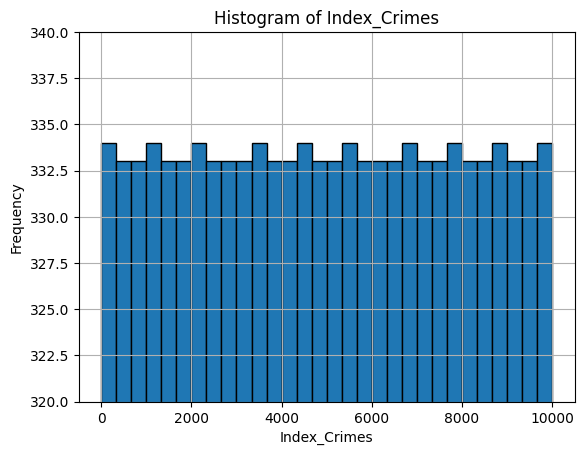

In [26]:
# Plot histogram for 'Index_Crimes'
df_encoded['Index_Crimes'].hist(bins=30,edgecolor='black',)
plt.title('Histogram of Index_Crimes')
plt.xlabel('Index_Crimes')
plt.ylabel('Frequency')
plt.ylim(320, 340)
plt.show()

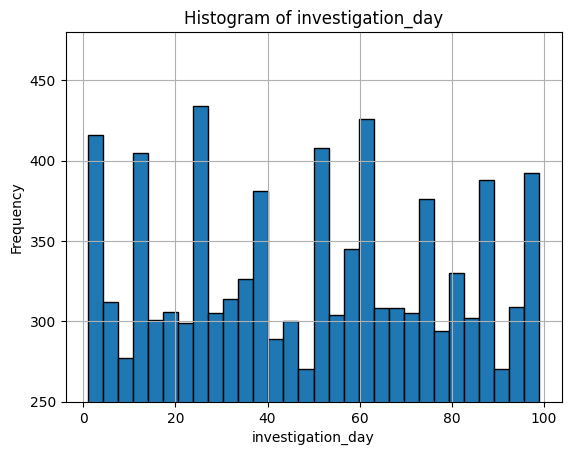

In [27]:
df_encoded['investigation_day'].hist(bins=30,edgecolor='black',)
plt.title('Histogram of investigation_day')
plt.xlabel('investigation_day')
plt.ylabel('Frequency')
plt.ylim(250, 480)
plt.show()

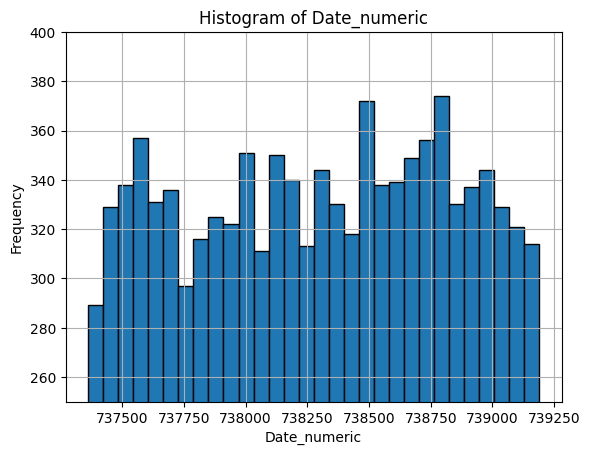

In [28]:
df_encoded['Date_numeric'].hist(bins=30,edgecolor='black',)
plt.title('Histogram of Date_numeric')
plt.xlabel('Date_numeric')
plt.ylabel('Frequency')
plt.ylim(250, 400)
plt.show()

In [29]:
# Convert true and false to 0 and 1
# 把ture false改为01
df_encoded['monster_invol_GHOST_numeric'] = df_encoded['monster_invol_GHOST'].astype(int)
df_encoded['monster_invol_GHOST_numeric'].head()


0    0
1    0
2    0
3    0
4    0
Name: monster_invol_GHOST_numeric, dtype: int64

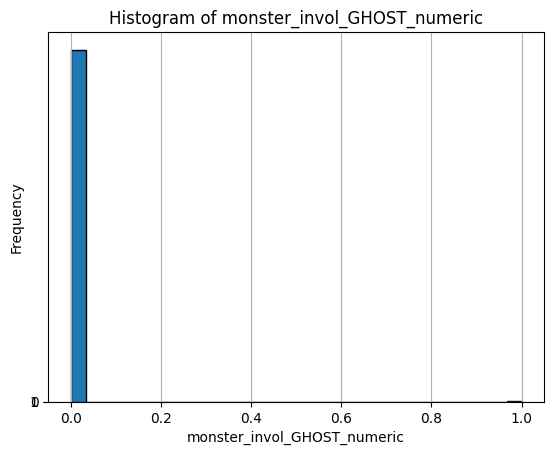

In [30]:
df_encoded['monster_invol_GHOST_numeric'].hist(bins=30,edgecolor='black',)
plt.title('Histogram of monster_invol_GHOST_numeric')
plt.xlabel('monster_invol_GHOST_numeric')
plt.ylabel('Frequency')
plt.yticks([0, 1])
plt.show()

In [31]:
df_encoded['Region_castle_numeric'] = df_encoded['Region_castle'].astype(int)
df_encoded['Region_castle_numeric'].head()

0    0
1    1
2    0
3    0
4    1
Name: Region_castle_numeric, dtype: int64

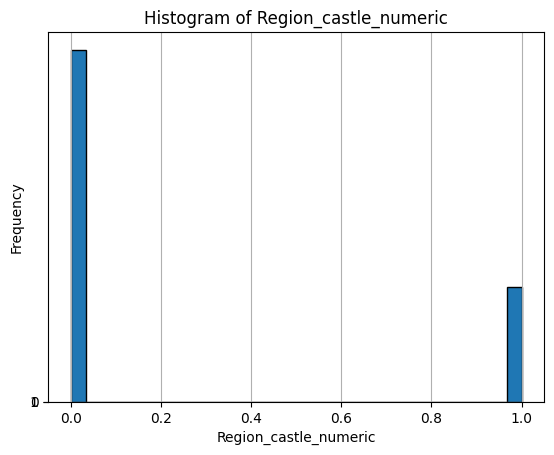

In [32]:
df_encoded['Region_castle_numeric'].hist(bins=30,edgecolor='black',)
plt.title('Histogram of Region_castle_numeric')
plt.xlabel('Region_castle_numeric')
plt.ylabel('Frequency')
plt.yticks([0, 1])
plt.show()

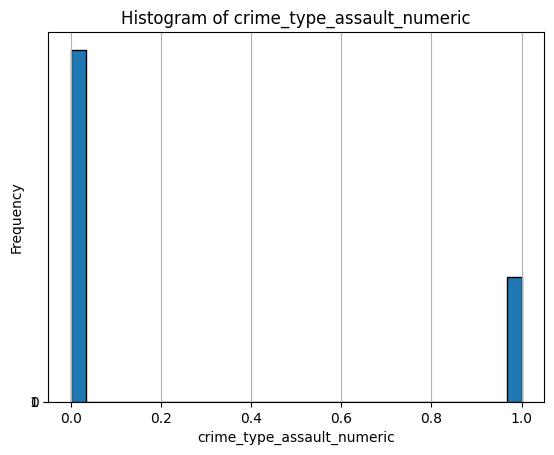

In [33]:
df_encoded['crime_type_assault_numeric'] = df_encoded['crime_type_assault'].astype(int)
df_encoded['crime_type_assault_numeric'].hist(bins=30,edgecolor='black',)
plt.title('Histogram of crime_type_assault_numeric')
plt.xlabel('crime_type_assault_numeric')
plt.ylabel('Frequency')
plt.yticks([0, 1])

plt.show()

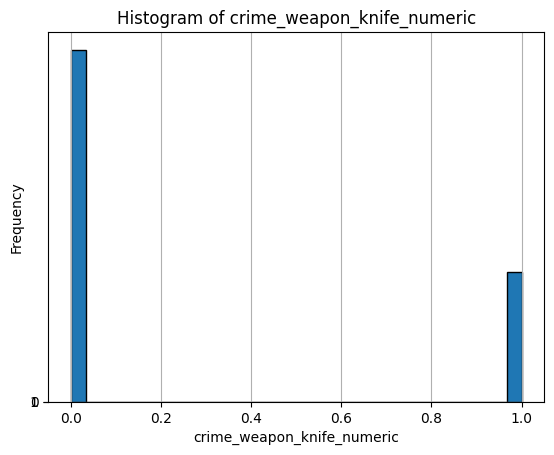

In [34]:
df_encoded['crime_weapon_knife_numeric'] = df_encoded['crime_weapon_knife'].astype(int)
df_encoded['crime_weapon_knife_numeric'].hist(bins=30,edgecolor='black',)
plt.title('Histogram of crime_weapon_knife_numeric')
plt.xlabel('crime_weapon_knife_numeric')

plt.ylabel('Frequency')
plt.yticks([0, 1])
plt.show()

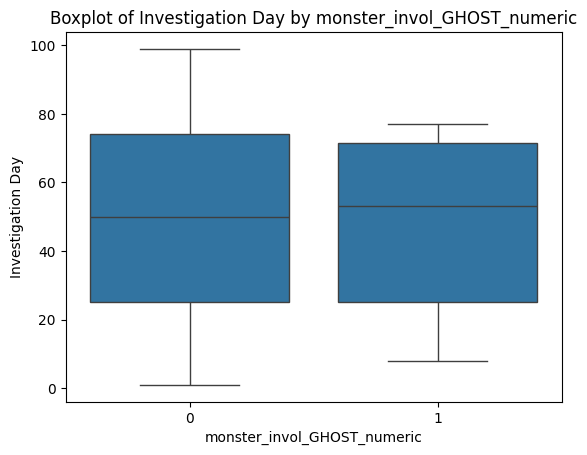

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='monster_invol_GHOST_numeric', y='investigation_day', data=df_encoded)
plt.title('Boxplot of Investigation Day by monster_invol_GHOST_numeric')
plt.xlabel('monster_invol_GHOST_numeric')
plt.ylabel('Investigation Day')
plt.show()

# How to read this plot:
# The box represents the 25%-75% range, the upper bound is 75% + 1.5 × 50%, and the lower bound is 25% - 1.5 × 50%.

# 这个图咋看：
#箱子里是25%-75%，上界是75% + 1.5 × 50%，下界是25% - 1.5 × 50%

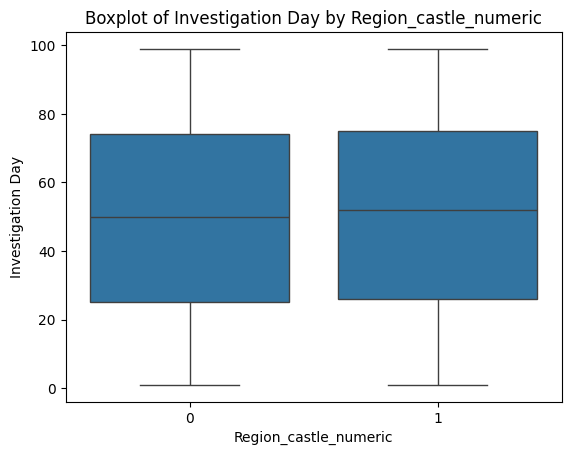

In [36]:

sns.boxplot(x='Region_castle_numeric', y='investigation_day', data=df_encoded)
plt.title('Boxplot of Investigation Day by Region_castle_numeric')
plt.xlabel('Region_castle_numeric')
plt.ylabel('Investigation Day')
plt.show()

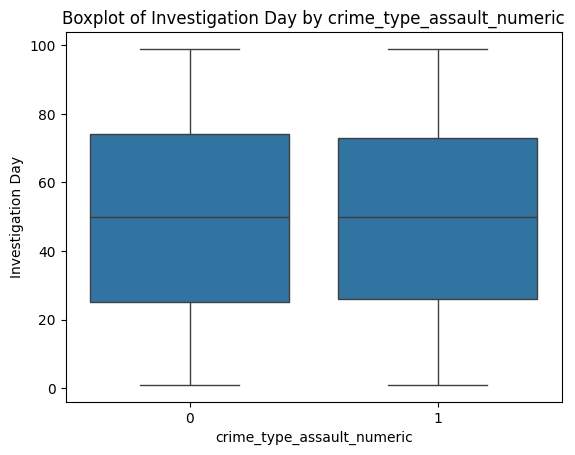

In [37]:

sns.boxplot(x='crime_type_assault_numeric', y='investigation_day', data=df_encoded)
plt.title('Boxplot of Investigation Day by crime_type_assault_numeric')
plt.xlabel('crime_type_assault_numeric')
plt.ylabel('Investigation Day')
plt.show()

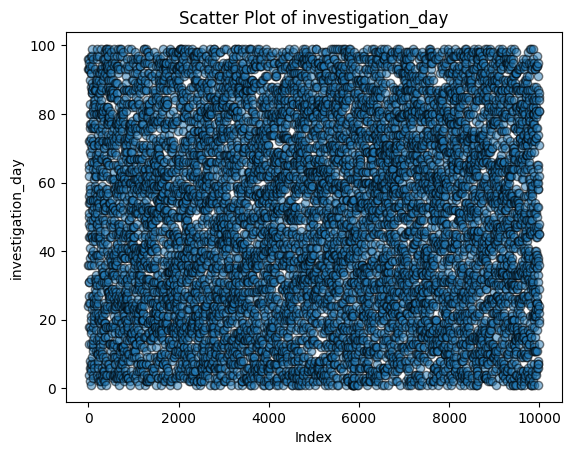

In [38]:
plt.scatter(range(len(df_encoded)), df_encoded['investigation_day'], alpha=0.5, edgecolor='black')
plt.title('Scatter Plot of investigation_day')
plt.xlabel('Index')
plt.ylabel('investigation_day')

plt.show()

In [42]:
df_crimes_rename.head()

,Index_Crimes,Date,monster_invol,investigation_day,Region,crime_type,crime_weapon,day_time,evidence_found,Date_numeric
0,3834,2022-11-15,Werewolf,24.0,mountain,assault,brute force,dusk,blood,738474.0
1,9635,2024-02-23,Vampire,36.0,castle,nightly disturbance,brute force,night,Blood,738939.0
2,348,2020-04-01,Skeleton,96.0,swamp,vandalism,brute force,dusk,bones,737516.0
3,6104,2022-07-05,Werewolf,93.0,mountain,assault,pistol,day,fur,738341.0
4,1379,2022-02-11,Vampire,50.0,castle,nightly disturbance,axe,night,blood,738197.0


In [68]:
# Convert everything to lowercase 
df_crimes_rename.loc[:, 'Region'] = df_crimes_rename['Region'].str.lower()
df_crimes_rename.loc[:, 'monster_invol'] = df_crimes_rename['monster_invol'].str.lower()
df_crimes_rename.loc[:, 'crime_type'] = df_crimes_rename['crime_type'].str.lower()
df_crimes_rename.loc[:, 'crime_weapon'] = df_crimes_rename['crime_weapon'].str.lower()
df_crimes_rename.loc[:, 'day_time'] = df_crimes_rename['day_time'].str.lower()
df_crimes_rename.loc[:, 'evidence_found'] = df_crimes_rename['evidence_found'].str.lower()

In [69]:
df_crimes_rename.head()

,Index_Crimes,Date,monster_invol,investigation_day,Region,crime_type,crime_weapon,day_time,evidence_found,Date_numeric
0,3834,2022-11-15,werewolf,24.0,mountain,assault,brute force,dusk,blood,738474.0
1,9635,2024-02-23,vampire,36.0,castle,nightly disturbance,brute force,night,blood,738939.0
2,348,2020-04-01,skeleton,96.0,swamp,vandalism,brute force,dusk,bones,737516.0
3,6104,2022-07-05,werewolf,93.0,mountain,assault,pistol,day,fur,738341.0
4,1379,2022-02-11,vampire,50.0,castle,nightly disturbance,axe,night,blood,738197.0


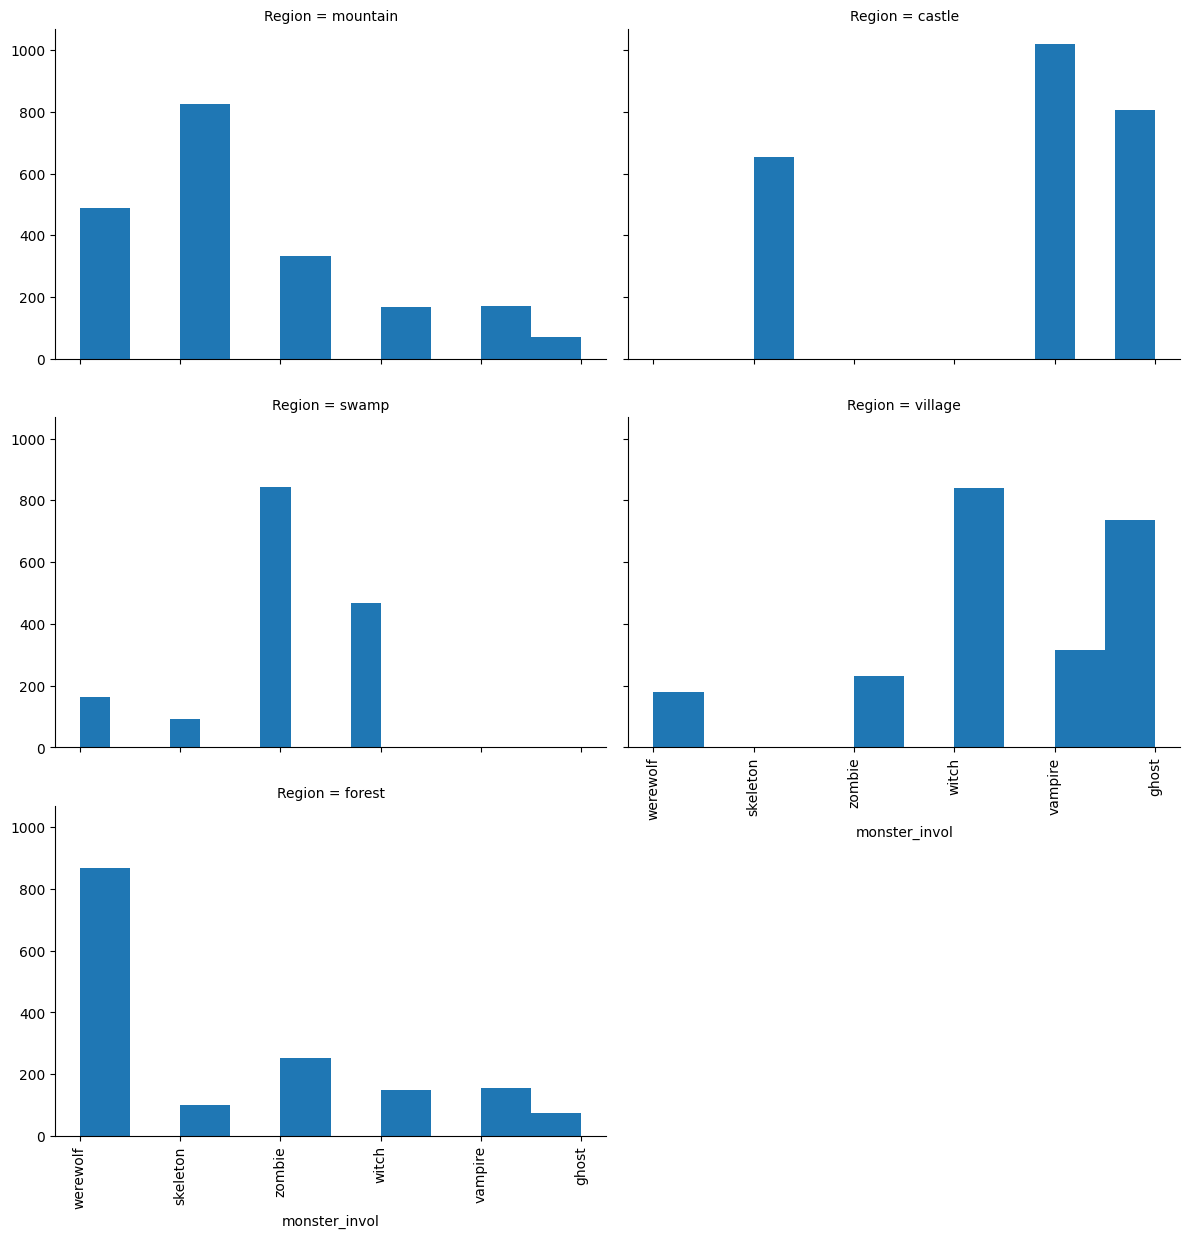

In [70]:

g = sns.FacetGrid(df_crimes_rename, col='Region',col_wrap=2, height=4, aspect=1.5)
g.map(plt.hist, 'monster_invol', bins=10)

# 设置所有子图的横坐标标签为竖直方向并确保所有图显示标签
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

plt.show()

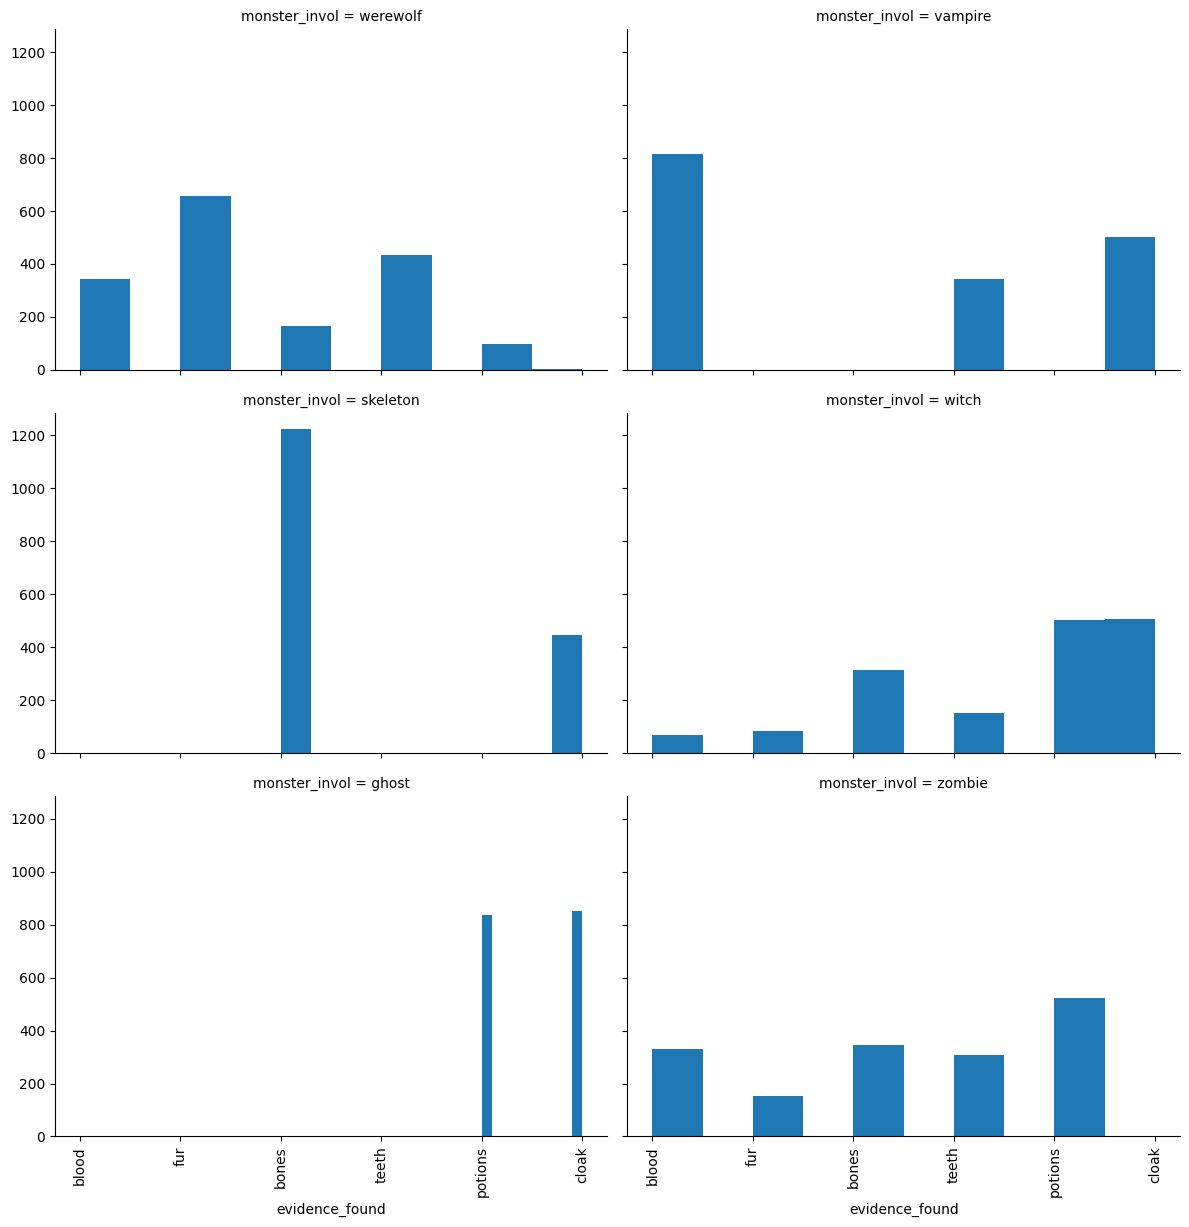

In [71]:

g = sns.FacetGrid(df_crimes_rename, col='monster_invol',col_wrap=2, height=4, aspect=1.5)
g.map(plt.hist, 'evidence_found', bins=10)

# 设置所有子图的横坐标标签为竖直方向并确保所有图显示标签
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

plt.show()

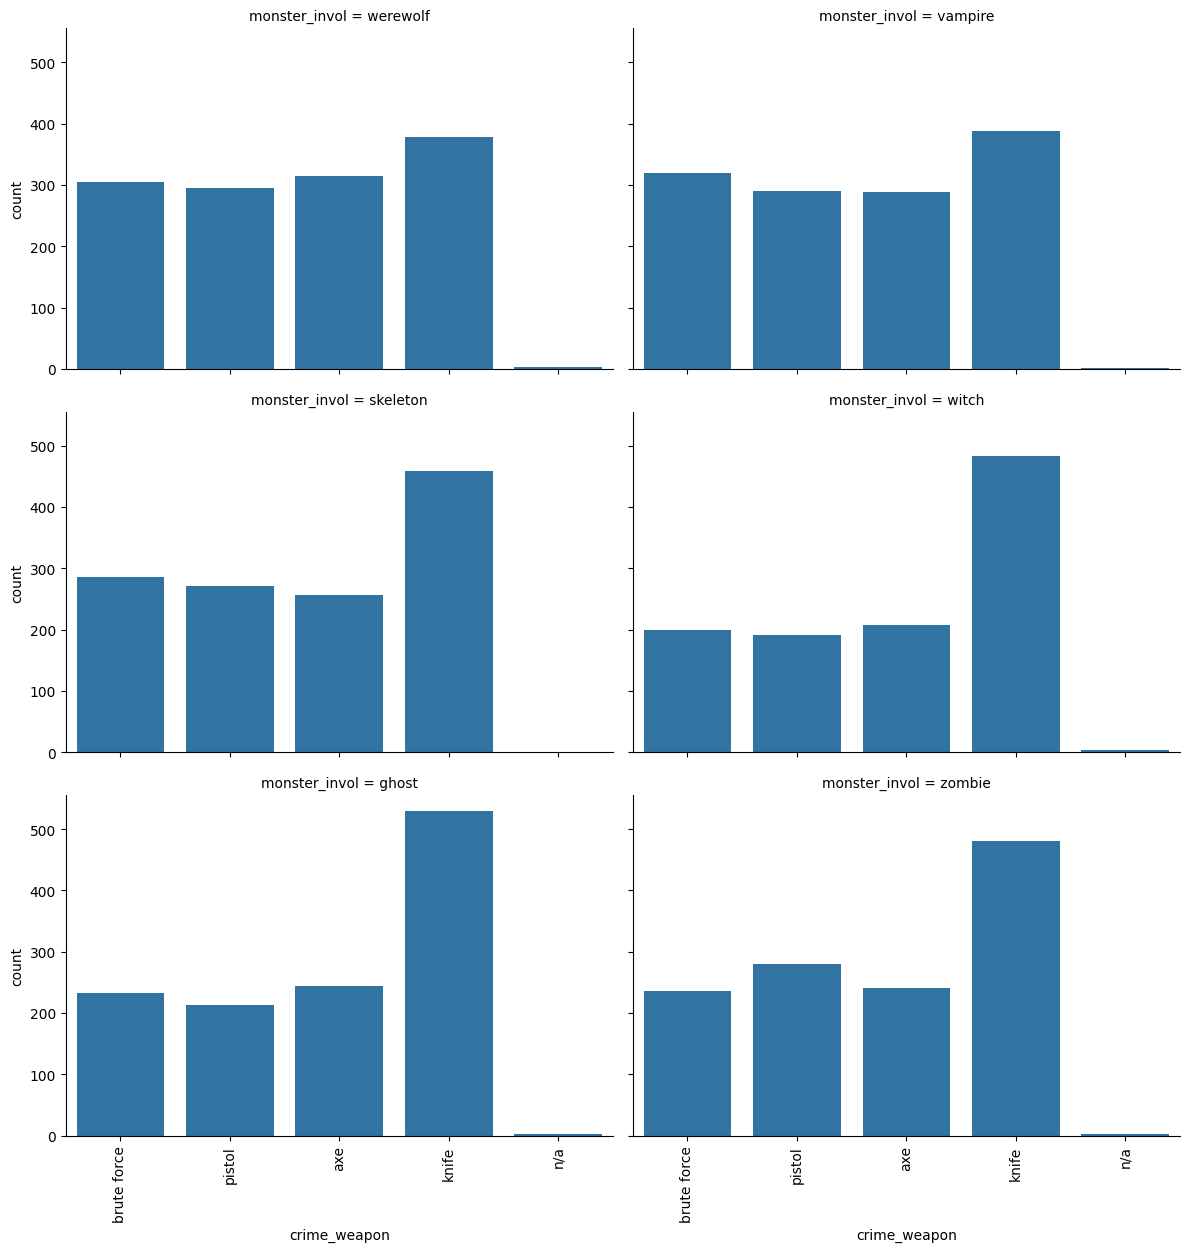

In [77]:
# Get all unique values in the 'crime_weapon' column to ensure countplot displays all categories
# 获取 crime_weapon 列的所有唯一值，以确保 countplot 显示所有类别
order = df_crimes_rename['crime_weapon'].dropna().unique()

# Create a FacetGrid and plot the frequency distribution of categorical data
# 创建 FacetGrid 并绘制类别型数据的频率分布
g = sns.FacetGrid(df_crimes_rename, col='monster_invol', col_wrap=2, height=4, aspect=1.5)
g.map(sns.countplot, 'crime_weapon', order=order)

# Set the x-axis labels of all subplots to be vertical and ensure labels are displayed for all plots
# 设置所有子图的横坐标标签为竖直方向并确保所有图显示标签
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

plt.show()